In [9]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Only reference API file
with open('api_key.txt', 'r') as file:
    api_key = file.read().strip()

# Initialize the Fred object with your API key
fred = Fred(api_key=api_key)

# Example: Get data for Real GDP, not GDP
gdp_data = fred.get_series('GDPC1')
gdp_df = pd.DataFrame({'Date': gdp_data.index, 'GDP': gdp_data.values})

# Filter real GDP data to include only data from 1948 to present
realgdp_df = gdp_df[gdp_df['Date'].dt.year >= 1948]

In [11]:
# Example: Get data for nominal GDP
nominal_gdp_data = fred.get_series('GDP')

# Convert nominal GDP data to DataFrame
nominal_gdp_df = pd.DataFrame({'Date': nominal_gdp_data.index, 'Nominal GDP': nominal_gdp_data.values})

# Filter nominal GDP data to include only data from 1948 to present
nominal_gdp_df = nominal_gdp_df[nominal_gdp_df['Date'].dt.year >= 1948]

# Display the DataFrame
print(nominal_gdp_df)

          Date  Nominal GDP
8   1948-01-01      265.742
9   1948-04-01      272.567
10  1948-07-01      279.196
11  1948-10-01      280.366
12  1949-01-01      275.034
..         ...          ...
307 2022-10-01    26408.405
308 2023-01-01    26813.601
309 2023-04-01    27063.012
310 2023-07-01    27610.128
311 2023-10-01    27956.998

[304 rows x 2 columns]


In [12]:
# Example: Get data for Consumer Price Index for All Urban Consumers: All Items
cpi_data = fred.get_series('CPIAUCNS')

# Convert CPI data to DataFrame
cpi_df = pd.DataFrame({'Date': cpi_data.index, 'CPI': cpi_data.values})

# Filter CPI data to include only data from 1948 to present
cpi_df = cpi_df[cpi_df['Date'].dt.year >= 1948]

# Display the DataFrame
print(cpi_df)

           Date      CPI
420  1948-01-01   23.700
421  1948-02-01   23.500
422  1948-03-01   23.400
423  1948-04-01   23.800
424  1948-05-01   23.900
...         ...      ...
1330 2023-11-01  307.051
1331 2023-12-01  306.746
1332 2024-01-01  308.417
1333 2024-02-01  310.326
1334 2024-03-01  312.332

[915 rows x 2 columns]


In [13]:
# Get data for Unemployment Rate
unemployment_data = fred.get_series('UNRATE')

unemployment_data.head(5)

#include data from FRED about average US housing prices ???

housing_data = fred.get_series('CSUSHPISA')

# Convert housing price data to DataFrame
housing_df = pd.DataFrame({'Date': housing_data.index, 'Average US Housing Prices': housing_data.values})

# Display the first 5 rows of the housing DataFrame
housing_data.tail(100)

# Example: Get data for Case-Shiller U.S. National Home Price Index
csushpin_data = fred.get_series('CSUSHPINSA')

# Convert data to DataFrame
csushpin_df = pd.DataFrame({'Date': csushpin_data.index, 'CSUSHPINSA': csushpin_data.values})

# Example: Get data for Existing Home Sales
exhoslusm495s_data = fred.get_series('EXHOSLUSM495S')

# Convert data to DataFrame
exhoslusm495s_df = pd.DataFrame({'Date': exhoslusm495s_data.index, 'EXHOSLUSM495S': exhoslusm495s_data.values})

len(csushpin_df)

#exhoslusm495s_df

589

In [14]:
# Example: Get data for Consumer Price Index for All Urban Consumers: All Items
cpi_data = fred.get_series('CPIAUCNS')

# Convert CPI data to DataFrame
cpi_df = pd.DataFrame({'Date': cpi_data.index, 'CPI': cpi_data.values})

In [15]:
# Example: Get data for Consumer Price Index for All Urban Consumers: All Items
cpi_data = fred.get_series('CPIAUCNS')

# Convert CPI data to DataFrame
cpi_df = pd.DataFrame({'Date': cpi_data.index, 'CPI': cpi_data.values})

# Example: Get data for Unemployment Rate
unemployment_data = fred.get_series('UNRATE')

# Convert unemployment data to DataFrame
unemployment_df = pd.DataFrame({'Date': unemployment_data.index, 'Unemployment Rate': unemployment_data.values})


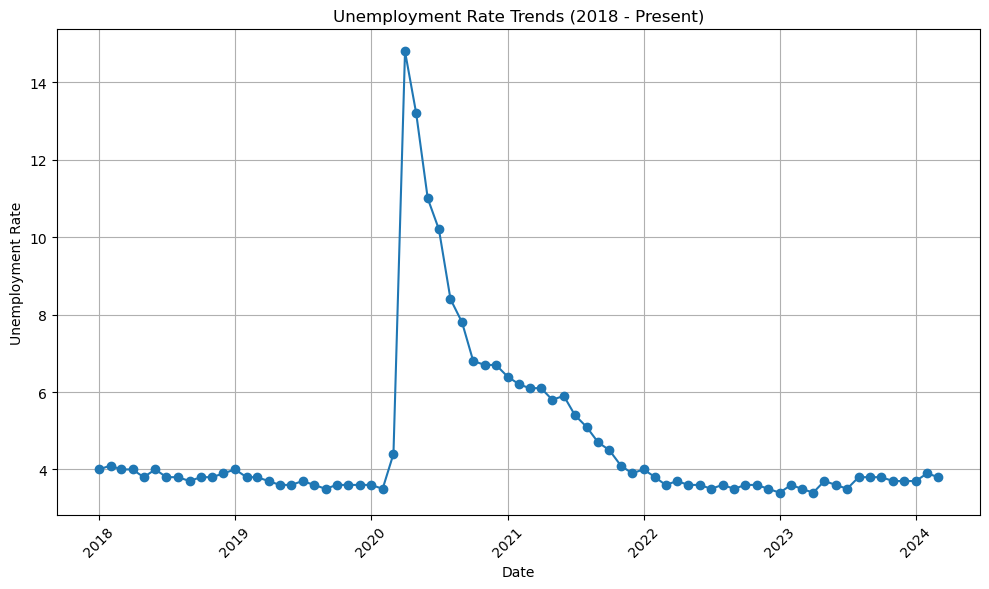

In [16]:
# Convert 'Date' column to datetime
unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'])

# Filter data from 2018 onwards
unemployment_df = unemployment_df[unemployment_df['Date'].dt.year >= 2018]

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(unemployment_df['Date'], unemployment_df['Unemployment Rate'], marker='o', linestyle='-')
plt.title('Unemployment Rate Trends (2018 - Present)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Example: Get data for Civilian Labor Force Participation Rate
civpart_data = fred.get_series('CIVPART')

# Convert data to DataFrame
civpart_df = pd.DataFrame({'Date': civpart_data.index, 'CIVPART': civpart_data.values})
civpart_data.head(100)
len(civpart_df)

915

In [18]:
# length is 914 - unemployment
# length is 814 - civpart - labor participation rate
# length is 914 - CPI
#    real GDP
len(realgdp_df)

304

In [19]:
# merge together Unemployment and Civpart
merged_civpart_unempl = pd.merge(civpart_df, unemployment_df, on='Date')

# Calculate the correlation between civpart and unemployment rate
merged_civpart_unempl['CIVPART'].corr(merged_civpart_unempl['Unemployment Rate'])

-0.7799089874381606

In [20]:
# Filter data for the last 5 years (from 2019 to today)
merged_civpart_unempl_last_5_years = merged_civpart_unempl[merged_civpart_unempl['Date'].dt.year >= 2019]

# Calculate the correlation between civpart and unemployment rate for the last 5 years
merged_civpart_unempl_last_5_years['CIVPART'].corr(merged_civpart_unempl_last_5_years['Unemployment Rate'])

# include - shows negative relationship

-0.7841120909410746

In [21]:
# Merge all DataFrames on the 'Date' column
full_df = cpi_df.merge(nominal_gdp_df, on='Date').merge(realgdp_df, on='Date').merge(unemployment_df, on='Date').merge(civpart_df, on='Date')

# Save full_df as CSV
# full_df.to_csv('full_data.csv', index=False)

In [22]:
# Check the types of variables in the DataFrame
print(full_df.dtypes)

Date                 datetime64[ns]
CPI                         float64
Nominal GDP                 float64
GDP                         float64
Unemployment Rate           float64
CIVPART                     float64
dtype: object


In [23]:
# Convert columns to numeric
full_df = full_df.apply(pd.to_numeric, errors='ignore')

# Check the data types after conversion
print("\nData types after conversion:")
print(full_df.dtypes)


Data types after conversion:
Date                   int64
CPI                  float64
Nominal GDP          float64
GDP                  float64
Unemployment Rate    float64
CIVPART              float64
dtype: object


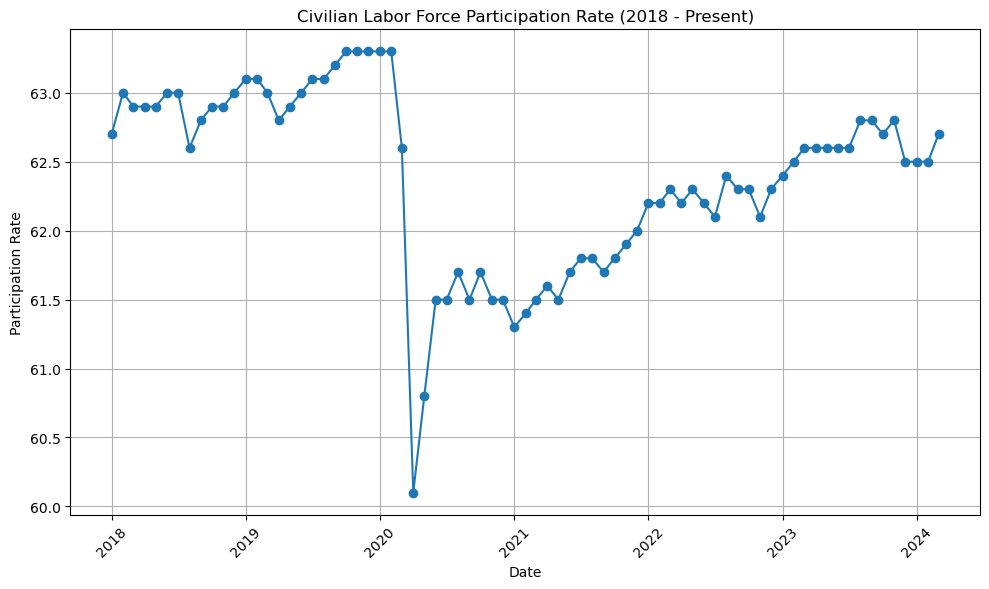

In [24]:
# Filter CIVPART data to include only data from 2018 to present
civpart_df_filtered = civpart_df[civpart_df['Date'].dt.year >= 2018]

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(civpart_df_filtered['Date'], civpart_df_filtered['CIVPART'], marker='o', linestyle='-')
plt.title('Civilian Labor Force Participation Rate (2018 - Present)')
plt.xlabel('Date')
plt.ylabel('Participation Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
realgdp_df['GDP'].mean()
nominal_gdp_df['Nominal GDP'].mean()
unemployment_df['Unemployment Rate'].mean()
civpart_df['CIVPART'].mean()
cpi_df["CPI"].mean()

87.7590149812734

In [26]:
#realgdp_df['GDP'].std()
#nominal_gdp_df['Nominal GDP'].std()
#civpart_df['CIVPART'].std()
#unemployment_df['Unemployment Rate'].std()
cpi_df['CPI'].std()

85.88279857613017

In [27]:
#realgdp_df['GDP'].unique().head(5)
realgdp_df['GDP'].value_counts().head(5)

GDP
2239.682     1
12703.742    1
13827.980    1
13604.771    1
13426.748    1
Name: count, dtype: int64

In [28]:
nominal_gdp_df['Nominal GDP'].value_counts().head(5)

Nominal GDP
265.742     1
8866.480    1
9900.169    1
9686.626    1
9526.210    1
Name: count, dtype: int64

In [29]:
civpart_df['CIVPART'].value_counts().head(5)

CIVPART
66.1    29
59.1    24
66.4    24
62.9    23
59.5    21
Name: count, dtype: int64

In [32]:
# Make Correlation Table

# Merge CPI and unemployment DataFrames on the 'Date' column
merged_df = pd.merge(cpi_df, unemployment_df, on='Date')

# Calculate the correlation between CPI and unemployment rate
correlation = merged_df['CPI'].corr(merged_df['Unemployment Rate'])

print("Correlation between CPI and Unemployment Rate:", correlation)

Correlation between CPI and Unemployment Rate: -0.2981155452400235


In [39]:
full_df['Date'] = pd.to_datetime(full_df['Date'])
full_df.dtypes

Date                 datetime64[ns]
CPI                         float64
Nominal GDP                 float64
GDP                         float64
Unemployment Rate           float64
CIVPART                     float64
dtype: object

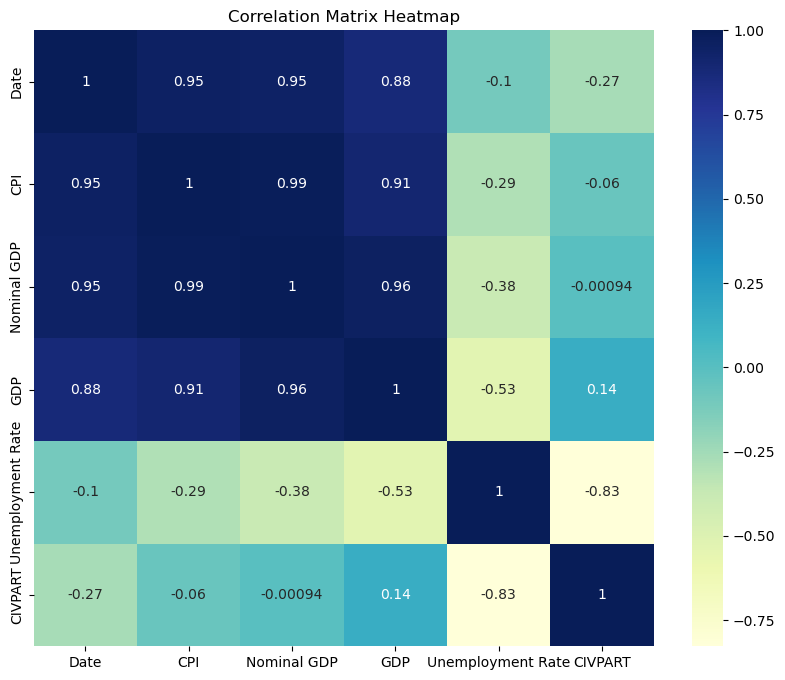

In [37]:
# Create the correlation matrix
corr_matrix = full_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

# Add title
plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()

In [6]:
#url = 'https://github.com/t-anderson21/blog-project/full_data.csv' # update this...
#df = pd.read_csv(url)
full_df = pd.read_csv("full_data.csv")

full_df.head()

,Date,CPI,Nominal GDP,GDP,Unemployment Rate,CIVPART
0,1948-01-01,23.7,265.742,2239.682,3.4,58.6
1,1948-04-01,23.8,272.567,2276.690,3.9,59.0
2,1948-07-01,24.4,279.196,2289.770,3.6,59.3
3,1948-10-01,24.4,280.366,2292.364,3.7,58.7
4,1949-01-01,24.0,275.034,2260.807,4.3,58.7


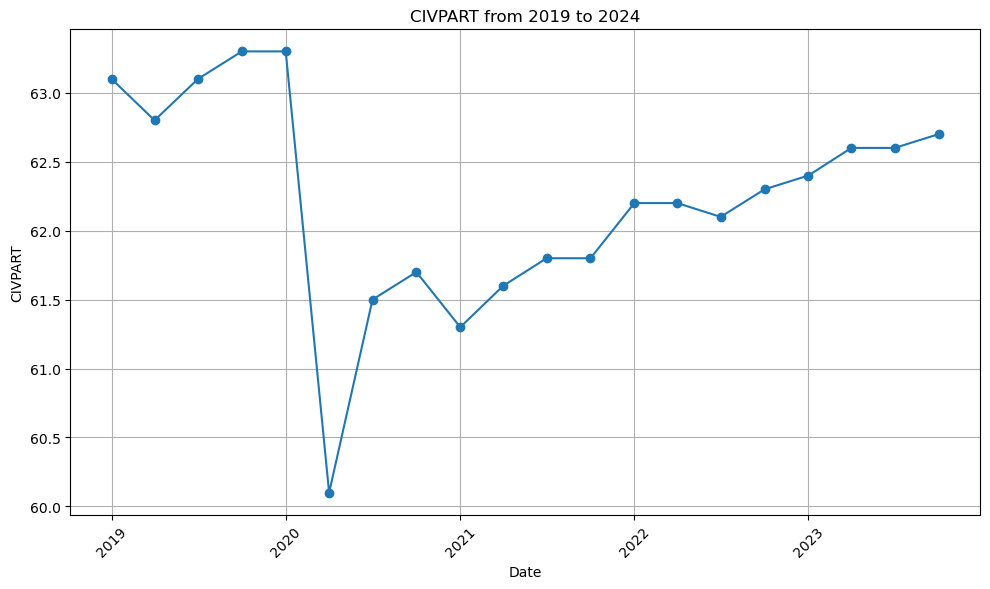

In [44]:
filtered_df = full_df[(full_df['Date'].dt.year >= 2019)]
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], filtered_df['CIVPART'], marker='o', linestyle='-')
plt.title('CIVPART from 2019 to 2024')
plt.xlabel('Date')
plt.ylabel('CIVPART')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

        Date      CPI  Nominal GDP        GDP  Unemployment Rate  CIVPART
0 2018-01-01  247.867    20328.553  20044.077                4.0     62.7
1 2018-04-01  250.546    20580.912  20150.476                4.0     62.9
2 2018-07-01  252.006    20798.730  20276.154                3.8     63.0
3 2018-10-01  252.885    20917.867  20304.874                3.8     62.9
4 2019-01-01  251.712    21104.133  20415.150                4.0     63.1
